In [148]:
# Import required libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [149]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [150]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [151]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Load the original data
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
print("Sample of scaled data:")
print(scaled_df.head())

print("\nShape of scaled data:", scaled_df.shape)


Sample of scaled data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash         

In [152]:
# Create a DataFrame with the scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index.tolist()

# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)


# Display sample data
print("Sample of scaled data:")
print(scaled_df.head())

print("\nShape of scaled data:", scaled_df.shape)

Sample of scaled data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash         

### Find the Best Value for k Using the Original Scaled DataFrame.

In [153]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

    k     inertia
0   1  287.000000
1   2  195.820218
2   3  123.190482
3   4   79.022435
4   5   65.302379
5   6   52.888518
6   7   43.914690
7   8   37.517032
8   9   32.485241
9  10   28.222899


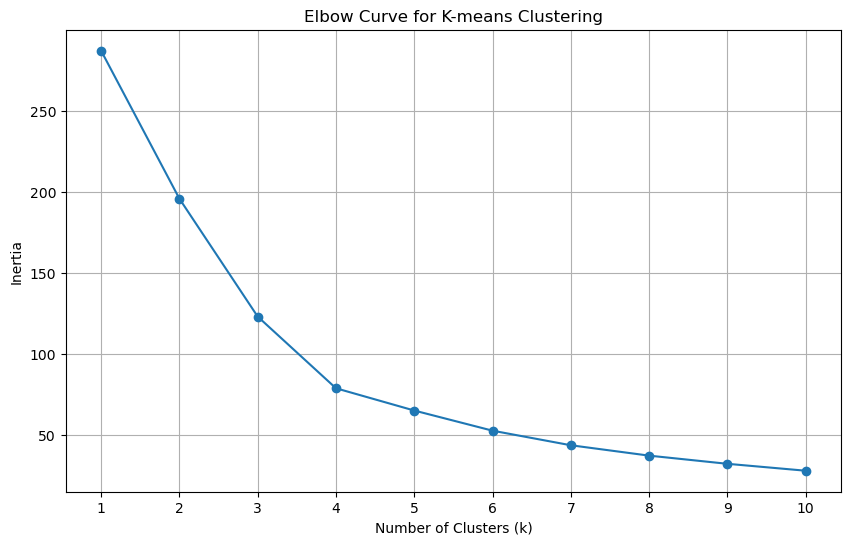

In [154]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**The best value for 'k' is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [155]:
# Initialize the K-Means model using the best value for k
best_k=4
# Initialize the K-Means model with the best k
best_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the model to the scaled data
best_model.fit(scaled_df)

print(f"K-Means model initialized with {best_k} clusters.")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means model initialized with 4 clusters.


In [156]:
# Fit the K-Means model using the scaled data
best_model.fit(scaled_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [157]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = best_model.predict(scaled_df)

# View the resulting array of cluster values.
print("Cluster predictions:")
print(crypto_clusters)
print("\nShape of cluster array:", crypto_clusters.shape)
print("\nUnique clusters:", np.unique(crypto_clusters))

Cluster predictions:
[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]

Shape of cluster array: (41,)

Unique clusters: [0 1 2 3]


In [158]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [159]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = crypto_clusters
# Add a new column to the DataFrame with the predicted clusters
clustered_df['Cluster'] = crypto_clusters
# Display sample data
print(clustered_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

<Figure size 1000x600 with 0 Axes>

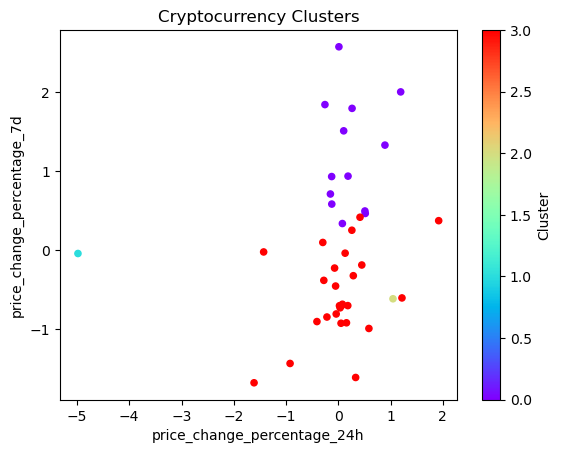

In [160]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
scatter = clustered_df.plot.scatter(x="price_change_percentage_24h", 
                                    y="price_change_percentage_7d", 
                                    c="Cluster", 
                                    colormap="rainbow")
plt.title("Cryptocurrency Clusters")
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [161]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [162]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [163]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Calculate total explained variance
total_explained_variance = sum(explained_variance)
print(f"Total explained variance: {total_explained_variance:.4f}")

Explained variance ratio: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.81481368 or approximately 81.48%.

In [164]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())
# Display info about the DataFrame
print("\nDataFrame Info:")
print(pca_df.info())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     41 non-null     float64
 1   PC2     41 non-null     float64
 2   PC3     41 non-null     float64
dtypes: float64(3)
memory usage: 1.3+ KB
None


### Find the Best Value for k Using the PCA Data

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

    k     inertia
0   1  256.874086
1   2  168.811896
2   3   93.774626
3   4   49.665497
4   5   37.878747
5   6   27.618972
6   7   21.182776
7   8   17.091637
8   9   13.667065
9  10   10.559358


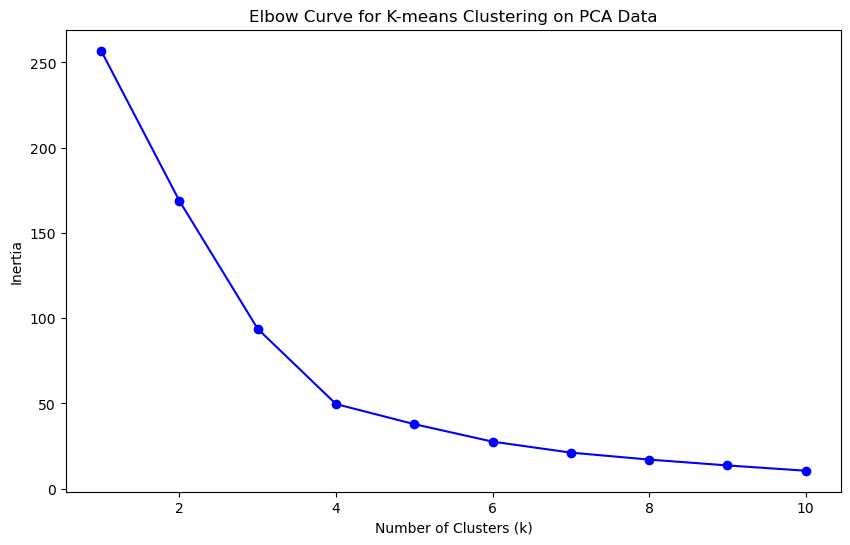

In [165]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pca_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# Plot the Elbow curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering on PCA Data')
plt.show()

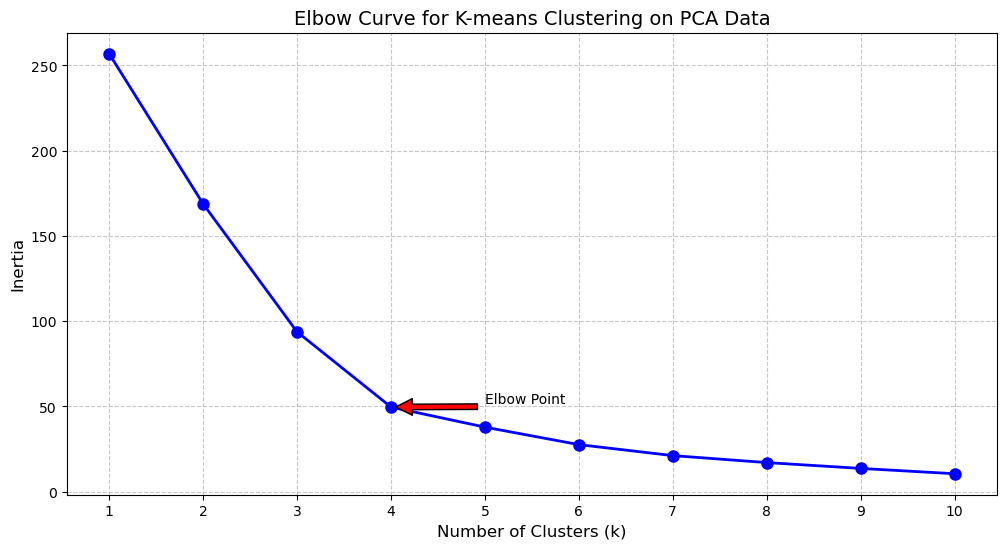

In [166]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(12, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Curve for K-means Clustering on PCA Data', fontsize=14)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)

plt.annotate('Elbow Point', xy=(4, elbow_df.loc[elbow_df['k'] == 4, 'inertia'].values[0]), 
             xytext=(5, elbow_df.loc[elbow_df['k'] == 4, 'inertia'].values[0] + 2),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data appears to be 4.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This value does not differ from the best k value found using the original data, which was also 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [167]:
# Initialize the K-Means model using the best value for k
best_k = 4  
best_model = KMeans(n_clusters=best_k, random_state=42)

In [168]:
# Fit the K-Means model using the PCA data
best_model.fit(pca_df)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [169]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = best_model.predict(pca_df)

# Print the resulting array of cluster values.
print("Cluster Predictions:")
print(cluster_predictions)
print("\nUnique clusters:", np.unique(cluster_predictions))
print("\nShape of cluster array:", cluster_predictions.shape)

Cluster Predictions:
[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]

Unique clusters: [0 1 2 3]

Shape of cluster array: (41,)


In [170]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = cluster_predictions

# Display sample data
print("\nSample of Clustered PCA Data:")
print(clustered_pca_df.head(10))


Sample of Clustered PCA Data:
                      PC1       PC2       PC3  Cluster
coin_id                                               
bitcoin         -0.600667  0.842760  0.461595        3
ethereum        -0.458261  0.458466  0.952877        3
tether          -0.433070 -0.168126 -0.641752        0
ripple          -0.471835 -0.222660 -0.479053        0
bitcoin-cash    -1.157800  2.041209  1.859715        3
binancecoin     -0.516534  1.388377  0.804071        3
chainlink       -0.450711  0.517699  2.846143        3
cardano         -0.345600  0.729439  1.478013        3
litecoin        -0.649468  0.432165  0.600303        3
bitcoin-cash-sv -0.759014 -0.201200 -0.217653        0


In [171]:
import hvplot.pandas

# Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`.
scatter_plot = clustered_pca_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters based on PCA',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    width=800,
    height=600,
    legend='top',
    colormap='viridis'
)

# Display the plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

PCA Components:
                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541

Explained Variance Ratio:
[0.3719856  0.34700813 0.17603793]


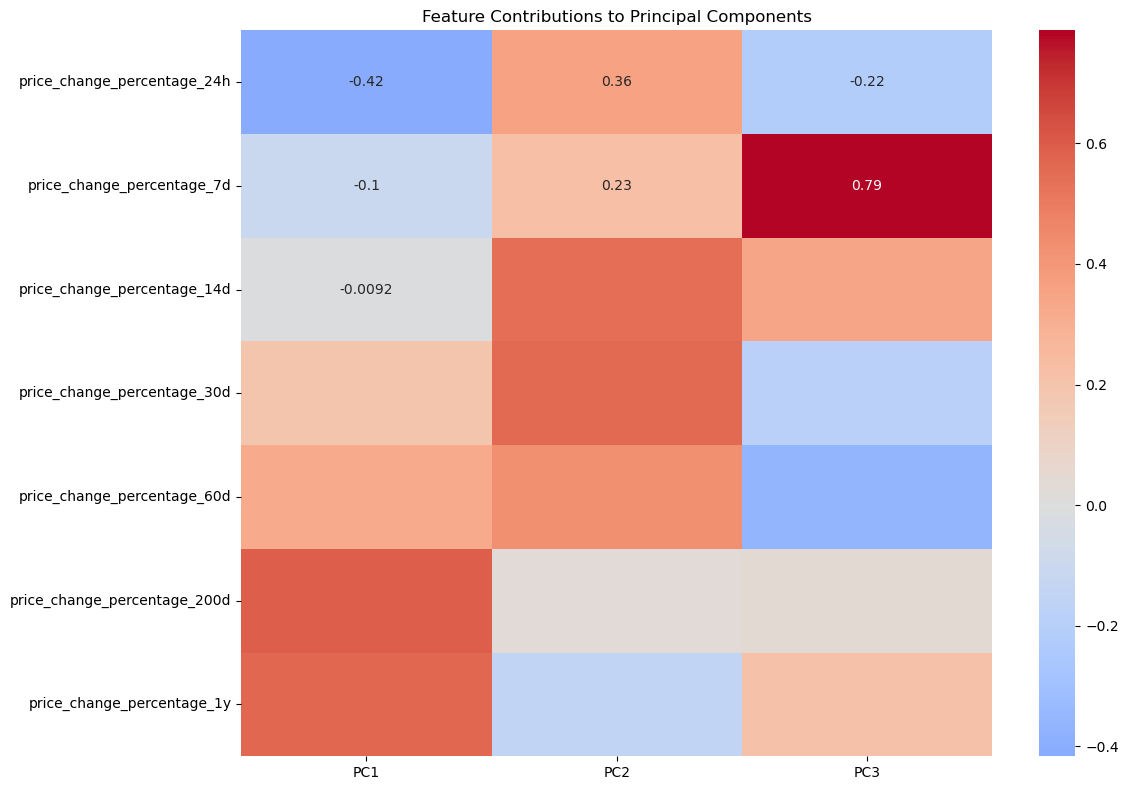

In [172]:
# Use the columns from the original scaled DataFrame as the index.
pca_components = pd.DataFrame(
    data=pca.components_.T,  # Transpose to get features as rows
    columns=['PC1', 'PC2', 'PC3'],
    index=scaled_df.columns
)

# Display the PCA components
print("PCA Components:")
print(pca_components)

# Display the explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Visualize the feature contributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()
plt.show()

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Based on the PCA components analysis, the feature with the strongest positive influence across all three principal components is the 1-year price change percentage (price_change_percentage_1y), indicating that long-term price trends are the most significant factor in differentiating cryptocurrencies in this dataset.
    